In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv', sep=',')

Check for wrong type and NULL:

In [3]:
# Check column types
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [4]:
# Check for nulls
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Check for bad data:

In [5]:
# check for zeros
df[df == 0].count() 

age           0
sex          96
cp          143
trtbps        0
chol          0
fbs         258
restecg     147
thalachh      0
exng        204
oldpeak      99
slp          21
caa         175
thall         2
output      138
dtype: int64

In [6]:
# check for negatives
df[df<0].count()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
# Check for duplicated rows:
len(df[df.duplicated()])

1

In [8]:
# Remove duplicated rows
df.drop_duplicates(inplace=True)

Impute missing values:

In [9]:
# no missing data for this dataset

In [10]:
Y = df.loc[:, df.columns == 'output']
X = df.loc[:, df.columns != 'output']

Data distribution

In [11]:
# check skew of data
X.skew()

age        -0.203743
sex        -0.786120
cp          0.493022
trtbps      0.716541
chol        1.147332
fbs         1.981201
restecg     0.169467
thalachh   -0.532671
exng        0.737281
oldpeak     1.266173
slp        -0.503247
caa         1.295738
thall      -0.481232
dtype: float64

In [12]:
X.kurtosis()

age        -0.527512
sex        -1.391273
cp         -1.183729
trtbps      0.922996
chol        4.542591
fbs         1.937947
restecg    -1.359464
thalachh   -0.062186
exng       -1.466170
oldpeak     1.567876
slp        -0.629935
caa         0.781003
thall       0.295855
dtype: float64

Standardizing data

In [13]:
columns = X.columns
X = pd.DataFrame(StandardScaler().fit_transform(X))
X.columns = columns

Checking for outliers:

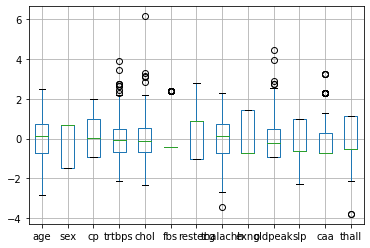

In [14]:
boxplot = X.boxplot() 

log transforming skewed columns:

c:\Anaconda38\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


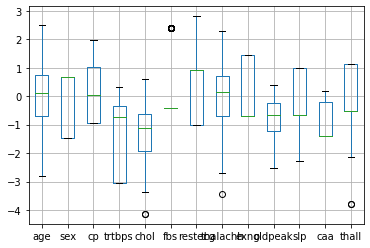

In [16]:
X_ca_log = np.log(X['caa'])
X['caa'] = X_ca_log
X_oldpeak_log = np.log(X['oldpeak'])
X['oldpeak'] = X_oldpeak_log
X_chol_log = np.log(X['chol'])
X['chol'] = X_chol_log
X_trtbps_log = np.log(X['trtbps'])
X['trtbps'] = X_trtbps_log
boxplot = X.boxplot()

Winsorizing outliers

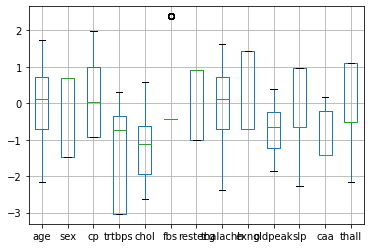

In [17]:
def winsorize_series(X):
    return winsorize(X, limits=[0.01,0.02])

X_win = X.apply(winsorize_series, axis=0)
boxplot = X_win.boxplot() 


Check for data imbalance

In [86]:
len(Y)

302